In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
#Credit Data
df1 = pd.read_csv("credit_risk_dataset.csv")
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#Real Estate
df2 = pd.read_csv("NYC_Real_Estate.csv")
df2.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

In [4]:
#Go.....
# Linear Regression:"NYC_Real_Estate.csv",
# Logistic Regression:"credit_risk_dataset.csv", 


<h3>Part 1 - Data Preparation: Both Datasets</h3>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df1.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df1 = df1.dropna()
df1.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df1_ = pd.get_dummies(df1, drop_first=True)
df1_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1


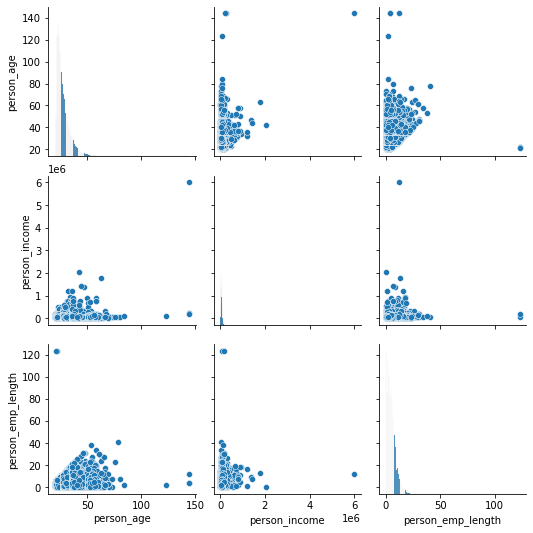

In [10]:
sns.pairplot(df1_[["person_age", "person_income", "person_emp_length"]])

In [11]:
# Remove outliers
df1_ = df1_[df1_["person_age"]<100]
df1_ = df1_[df1_["person_income"]<4000000]
df1_ = df1_[df1_["person_emp_length"]<100]
df1_.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,...,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553,0.003283,0.076558,...,0.184863,0.170264,0.174595,0.319538,0.198973,0.113405,0.030386,0.007300,0.002061,0.178192
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133,0.057205,0.265893,...,0.388193,0.375871,0.379627,0.466306,0.399235,0.317092,0.171649,0.085126,0.045348,0.382681
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df2.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [13]:
df2.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,4.824800e+04
mean,3.251554,4984.154535,234.400742,10939.604087,2.569682,2.837755,3.672552e+03,1827.738082,1.155576e+06
std,0.903331,3427.528068,496.413133,1072.741157,17.468624,20.752771,2.947540e+04,464.418481,1.340423e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2204.000000,21.000000,10469.000000,1.000000,1.000000,8.280000e+02,1920.000000,8.056000e+04
50%,3.000000,4660.000000,45.000000,11217.000000,1.000000,1.000000,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,6996.000000,94.000000,11237.000000,2.000000,2.000000,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48248 non-null  int64 
 1   BLOCK                           48248 non-null  int64 
 2   LOT                             48248 non-null  int64 
 3   ZIP CODE                        48248 non-null  int64 
 4   RESIDENTIAL UNITS               48248 non-null  int64 
 5   TOTAL UNITS                     48248 non-null  int64 
 6   GROSS SQUARE FEET               48248 non-null  int64 
 7   YEAR BUILT                      48248 non-null  int64 
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object
 10  SALE PRICE                      48248 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ MB


In [15]:
df2.isna().sum()

BOROUGH                           0
BLOCK                             0
LOT                               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

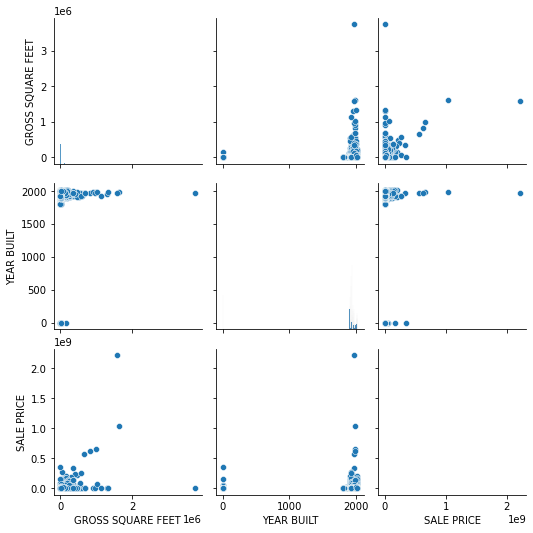

In [16]:
sns.pairplot(df2[["GROSS SQUARE FEET", "YEAR BUILT", "SALE PRICE"]])

In [17]:
# Remove outliers
df2 = df2[df2["GROSS SQUARE FEET"]<2000000]
df2 = df2[df2["YEAR BUILT"]>0]
df2 = df2[df2["ZIP CODE"]>0]
df2 = df2[df2["SALE PRICE"]<2000000000]
df2.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000,45318.000000,4.531800e+04,45318.000000,4.531800e+04
mean,3.283530,5054.613090,181.689042,11029.296549,2.655766,2.934419,3.783272e+03,1945.124564,1.132959e+06
std,0.915933,3464.893587,388.633243,421.810355,15.749350,19.488961,2.362589e+04,34.314081,8.957340e+06
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000e+00,1800.000000,0.000000e+00
25%,3.000000,2230.000000,21.000000,10470.000000,1.000000,1.000000,1.090000e+03,1920.000000,1.300000e+05
50%,3.000000,4743.500000,43.000000,11218.000000,1.000000,1.000000,1.720000e+03,1931.000000,4.900000e+05
75%,4.000000,7083.000000,78.000000,11238.000000,2.000000,2.000000,2.600000e+03,1964.000000,8.350000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,948.000000,2261.000000,1.617206e+06,2017.000000,1.040000e+09


In [18]:
df2_ = df2.drop(columns={"TAX CLASS AT TIME OF SALE","BUILDING CLASS AT TIME OF SALE"})
df2_['BOROUGH'] = df2_['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df2_ = pd.get_dummies(df2_, drop_first=True)
df2_.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island
0,392,6,10009,5,5,6440,1900,6625000,0,1,0,0
1,402,21,10009,10,10,6794,1913,3936272,0,1,0,0
2,404,55,10009,6,6,4615,1900,8000000,0,1,0,0
3,406,32,10009,8,8,4226,1920,3192840,0,1,0,0
4,387,153,10009,24,24,18523,1920,16232000,0,1,0,0


<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

In [21]:
#X values in a DF
dfX = df2_.drop(columns={"SALE PRICE"})
dfY = df2_["SALE PRICE"]

#If we want an array for sklearn
y = np.array(dfY).reshape(-1,1)
x = np.array(dfX)
x.shape, y.shape

((45318, 11), (45318, 1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

print("X-Train:", X_train.shape)
print("X-Test:", X_test.shape)
print("Y-Train:", y_train.shape)
print("Y-Test:", y_test.shape)

X-Train: (30363, 11)
X-Test: (14955, 11)
Y-Train: (30363, 1)
Y-Test: (14955, 1)


In [23]:
#Setup


In [26]:
#Generate model 
#Train model and get R2 from training

model = LinearRegression().fit(X_train,y_train)
print("Training R2:", model.score(X_train,y_train))

Training R2: 0.2423906280480771


In [27]:
#RMSE with test data
pred = model.predict(X_test)
print("RMSE test:", mean_squared_error(pred,y_test,squared=False))
print("R2 test:", model.score(X_test,y_test))

RMSE test: 10416501.916061234
R2 test: 0.2007669178754593


In [35]:
score1 = model.score(X_test, y_test)
print(score1)

0.2007669178754593


In [30]:
#Statsmodels.
#Fit the model. 
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     1940.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:36:46   Log-Likelihood:            -7.8101e+05
No. Observations:               45318   AIC:                         1.562e+06
Df Residuals:                   45306   BIC:                         1.562e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.141e+07   8.34e+06      2.568      0.0

In [41]:
#RMSE
ypred = est2.predict(X2)
mean_squared_error(y, ypred, squared=False)

7385251.651219348

From the evaluation, it can be observed that R2 is extremely low and RMSE is high.


<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.


In [32]:
df1_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# splitting data 
dfX1 = df1_.drop(columns={"loan_status"})
dfY1 = df1_["loan_status"]

y1 = np.array(dfY1).reshape(-1,1)
x1 = np.array(dfX1)
x1.shape, y1.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33)

print("X-Train:", X_train1.shape)
print("X-Test:", X_test1.shape)
print("Y-Train:", y_train1.shape)
print("Y-Test:", y_test1.shape)

X-Train: (19183, 22)
X-Test: (9449, 22)
Y-Train: (19183, 1)
Y-Test: (9449, 1)


In [34]:
# logistic regression

model1 = LogisticRegression().fit(X_train1,y_train1.ravel())
pred1 = model1.predict(X_test1)

score1 = model1.score(X_test1, y_test1)
print(score1)
model1.coef_  #coefficient

0.8056937242036194


array([[-7.05563113e-08, -3.98337100e-05, -3.01818056e-08,
         1.04499770e-04,  9.26854956e-08,  2.44605473e-09,
        -1.35812712e-08,  8.19585117e-11, -3.87687839e-09,
         7.76701570e-09, -3.27231194e-09,  1.71314869e-09,
         1.41159663e-09, -1.32848816e-09, -3.67426524e-09,
        -6.10133818e-09, -1.56438528e-09,  1.11746829e-08,
         3.69052542e-09,  1.04375917e-09,  4.37007549e-10,
         7.53829838e-09]])

In [45]:
# R2 from train data
print("Training R2:", model1.score(X_train1,y_train1))
#RMSE with test data
print("RMSE test:", mean_squared_error(pred1, y_test1, squared=False))
print("R2 test:", model1.score(X_test1, y_test1))

Training R2: 0.8067038523692853
RMSE test: 0.44080185548200745
R2 test: 0.8056937242036194


Accuracy score is : 80.56937242036194


<AxesSubplot:>

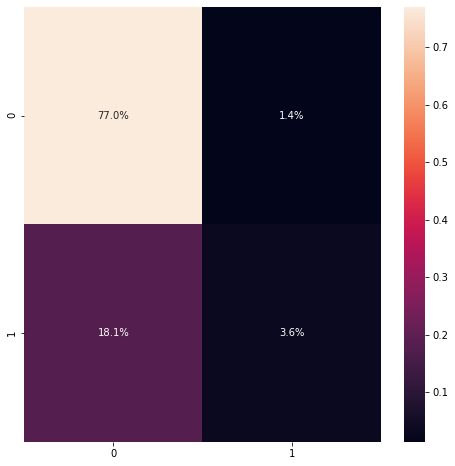

In [39]:

print("Accuracy score is :",accuracy_score(y_test1, pred1)*100)
conf1 = confusion_matrix(y_test1, pred1)
sns.heatmap(conf1/np.sum(conf1), annot=True, fmt=".1%")



<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h2>Linear Regression - Real Estate Data</h2>

<ul>
<li>This model is not suitable for linear rgression.
<li>It has only 0.2007669178754593 score, that means approximately 20% accuracy.
<li>RMSE is very high.
<li>Models in both scikitlearn and statsmodel have low R2 and high RMSE.
</ul>

<h2>Logistic Regression - Credit Card Data</h2>
<ul>
<li>Logistic REgression is a good model for Credit Card Data.
<li>It has 80.57 accuracy score.
<li>High R2 approximately 0.80
<li>RMSE is0.44
<li>True Negative is 77% and True Positive is only 3.6%
</ul>
